# ***Prof. Ana Isabel Castillo*** ▶

In [10]:
!pip install numpy scipy matplotlib

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Função Black-Scholes

In [12]:
def black_scholes(S0, K, T, r, sigma, option_type="call"):
    """
    Calcula o preço de uma opção europeia usando Black-Scholes.
    S0: Preço inicial do ativo
    K: Preço de exercício (strike)
    T: Tempo até vencimento (anos)
    r: Taxa de juros livre de risco
    sigma: Volatilidade
    option_type: 'call' ou 'put'
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

    return price

# Parâmetros

In [13]:
S0 = 100  # Preço inicial do ativo
K = 100   # Strike
T = 1.0   # 1 ano
r = 0.05  # Taxa de juros (5%)
sigma = 0.2  # Volatilidade (20%)

# Calcular preços

In [15]:
call_price = black_scholes(S0, K, T, r, sigma, "call")
put_price = black_scholes(S0, K, T, r, sigma, "put")
print(f"Preço da Call: ${call_price:.2f}")
print(f"Preço da Put: ${put_price:.2f}")

Preço da Call: $10.45
Preço da Put: $5.57



# Gráfico 1: Preço da opção vs. Preço do ativo (S0)

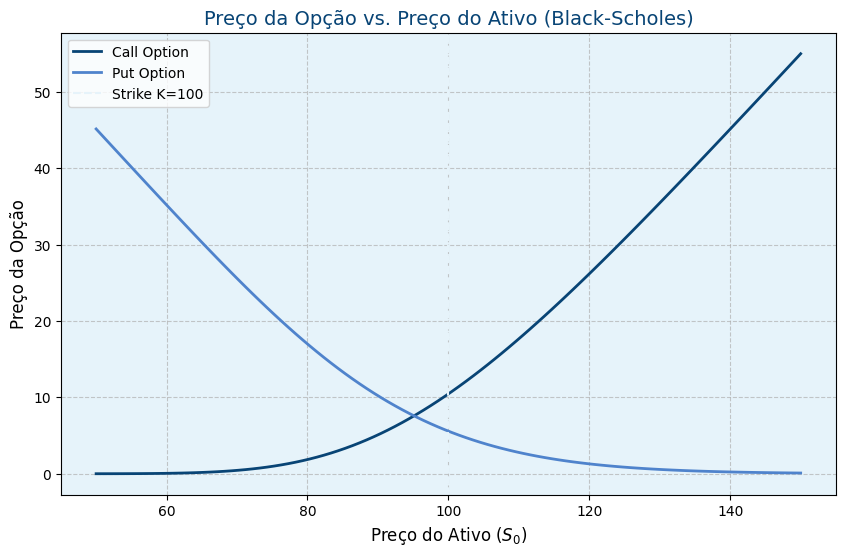

In [16]:
S0_range = np.linspace(50, 150, 100)  # S0 de 50 a 150
call_prices = [black_scholes(S, K, T, r, sigma, "call") for S in S0_range]
put_prices = [black_scholes(S, K, T, r, sigma, "put") for S in S0_range]

plt.figure(figsize=(10, 6))
plt.plot(S0_range, call_prices, label="Call Option", color="#084475", linewidth=2)
plt.plot(S0_range, put_prices, label="Put Option", color="#4F83CC", linewidth=2)
plt.axvline(K, color="#E6F3FA", linestyle="--", label=f"Strike K={K}")
plt.title("Preço da Opção vs. Preço do Ativo (Black-Scholes)", fontsize=14, color="#084475")
plt.xlabel("Preço do Ativo ($S_0$)", fontsize=12)
plt.ylabel("Preço da Opção", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.style.use("default")
plt.gca().set_facecolor("#E6F3FA")
plt.gcf().set_facecolor("#FFFFFF")
plt.show()  # Mostra o gráfico na tela
plt.savefig("call_put_vs_S0.png", dpi=300, bbox_inches="tight")  # Salva como PNG
plt.close()  # Fecha pra liberar memória


# Gráfico 2: Preço da opção vs. Volatilidade (sigma)

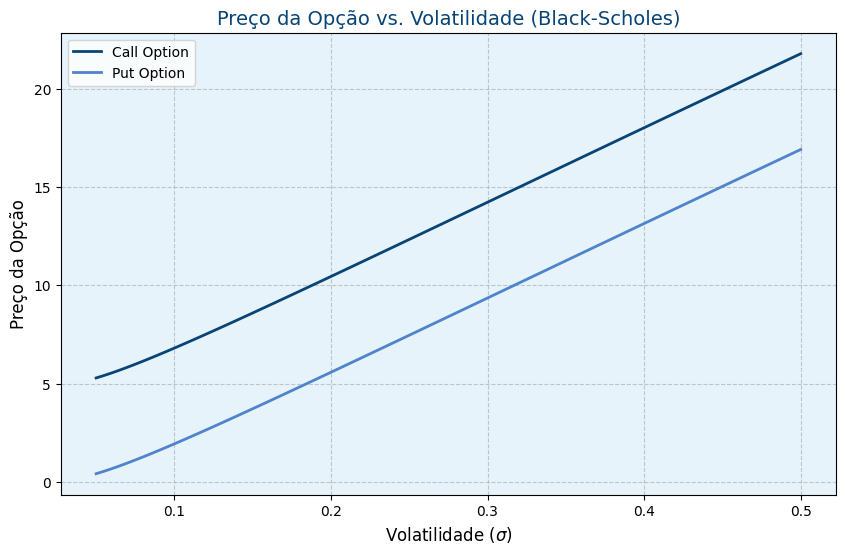

In [17]:
sigma_range = np.linspace(0.05, 0.5, 100)  # Volatilidade de 5% a 50%
call_prices_sigma = [black_scholes(S0, K, T, r, s, "call") for s in sigma_range]
put_prices_sigma = [black_scholes(S0, K, T, r, s, "put") for s in sigma_range]

plt.figure(figsize=(10, 6))
plt.plot(sigma_range, call_prices_sigma, label="Call Option", color="#084475", linewidth=2)
plt.plot(sigma_range, put_prices_sigma, label="Put Option", color="#4F83CC", linewidth=2)
plt.title("Preço da Opção vs. Volatilidade (Black-Scholes)", fontsize=14, color="#084475")
plt.xlabel("Volatilidade ($\sigma$)", fontsize=12)
plt.ylabel("Preço da Opção", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().set_facecolor("#E6F3FA")
plt.gcf().set_facecolor("#FFFFFF")
plt.show()  # Mostra o gráfico na tela
plt.savefig("call_put_vs_sigma.png", dpi=300, bbox_inches="tight")  # Salva como PNG
plt.close()

# Gráfico 3: Payoff no vencimento

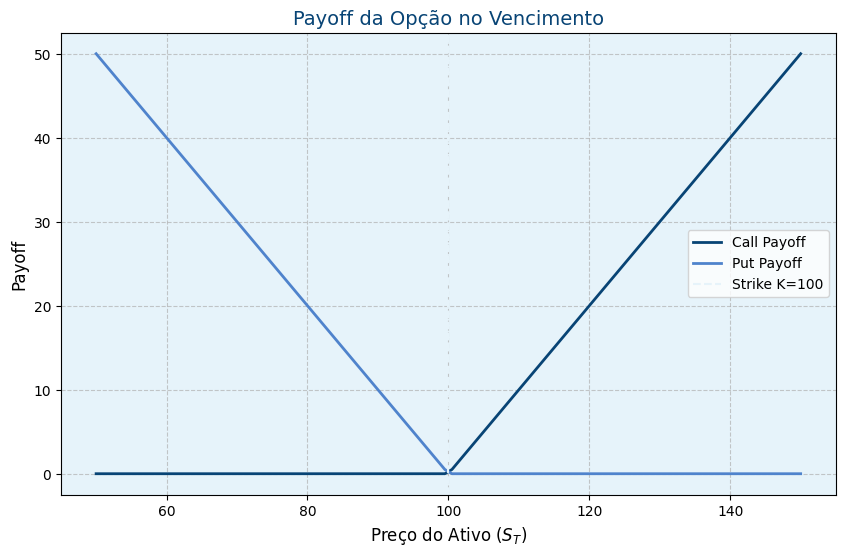

In [18]:
S0_range = np.linspace(50, 150, 100)
call_payoff = np.maximum(S0_range - K, 0)
put_payoff = np.maximum(K - S0_range, 0)

plt.figure(figsize=(10, 6))
plt.plot(S0_range, call_payoff, label="Call Payoff", color="#084475", linewidth=2)
plt.plot(S0_range, put_payoff, label="Put Payoff", color="#4F83CC", linewidth=2)
plt.axvline(K, color="#E6F3FA", linestyle="--", label=f"Strike K={K}")
plt.title("Payoff da Opção no Vencimento", fontsize=14, color="#084475")
plt.xlabel("Preço do Ativo ($S_T$)", fontsize=12)
plt.ylabel("Payoff", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().set_facecolor("#E6F3FA")
plt.gcf().set_facecolor("#FFFFFF")
plt.show()  # Mostra o gráfico na tela
plt.savefig("option_payoff.png", dpi=300, bbox_inches="tight")  # Salva como PNG
plt.close()

O gráfico 1. Mostra o preço de uma opção europeia (call e put) calculado pela fórmula Black-Scholes em função do preço inicial do ativo (S0S_0S_0), variando de $50 a $150, com preço de exercício (( K )) fixo em $100. A curva da call sobe à medida que S0S_0S_0 aumenta, refletindo maior valor intrínseco, enquanto a put cai, pois seu payoff diminui. A linha tracejada marca o strike, destacando a região onde as opções entram "no dinheiro". Útil para entender a sensibilidade do preço da opção ao ativo subjacente, essencial em estratégias de hedge e portfólios financeiros.



O gráfico 2. Ilustra como o preço de uma opção europeia (call e put) varia com a volatilidade (σ\sigma\sigma), de 5% a 50%, mantendo S0=100S_0 = 100S_0 = 100, K=100K = 100K = 100, e outros parâmetros fixos. Tanto a call quanto a put aumentam com maior volatilidade, pois a incerteza eleva a probabilidade de grandes movimentos no preço do ativo, aumentando o valor da opção. Este gráfico é crucial para avaliar o impacto da volatilidade implícita em mercados financeiros e otimizar estratégias de negociação.



O gráfico 3. Exibe o payoff de uma opção europeia (call e put) no vencimento, em função do preço do ativo (STS_TS_T), variando de $50 a $150, com strike (K=100K = 100K = 100). A call tem payoff max⁡(ST−K,0)\max(S_T - K, 0)\max(S_T - K, 0), formando um "V" ascendente, enquanto a put tem payoff max⁡(K−ST,0)\max(K - S_T, 0)\max(K - S_T, 0), em forma de "V" descendente. A linha tracejada indica o strike, separando as regiões "no dinheiro" e "fora do dinheiro". Fundamental para visualizar o retorno potencial de opções e planejar estratégias de investimento.



E-mail: anacp20@gmail.com ⚓
